In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [12]:
import xgboost as xgb

In [13]:
from tensorflow import keras

In [14]:
import tensorflow as tf

In [15]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")


In [16]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [17]:
df=df.drop("id",axis=1)


In [18]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [19]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [21]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [22]:
df.shape

(5110, 11)

In [23]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

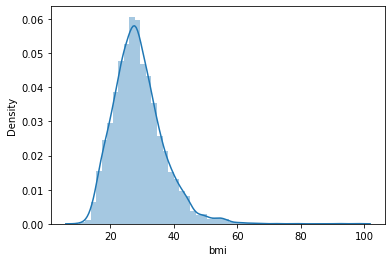

In [24]:
sns.distplot(df['bmi'])

In [25]:
mean_val=df['bmi'].mean()

In [26]:
df['bmi']=df['bmi'].fillna(mean_val)

In [27]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

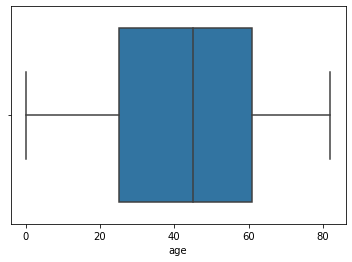

In [28]:
sns.boxplot(df['age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension'>

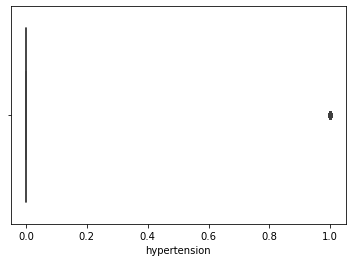

In [29]:
sns.boxplot(df['hypertension'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

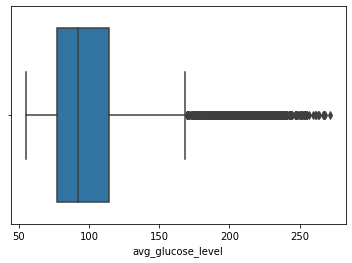

In [30]:
sns.boxplot(df['avg_glucose_level'])

In [31]:
q1=df['avg_glucose_level'].quantile(0.25)


In [32]:
q3=df['avg_glucose_level'].quantile(0.75)


In [33]:
IQR=q3-q1

In [34]:
lower=q1-1.5*IQR

In [35]:
upper=q3+1.5*IQR

In [36]:
df=df[(df['avg_glucose_level']>lower) & (df['avg_glucose_level']<upper)]

In [37]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

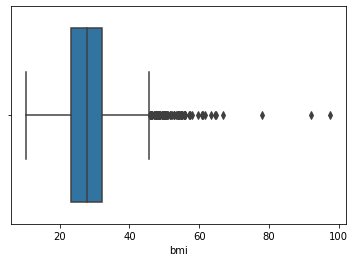

In [38]:
sns.boxplot(df['bmi'])

In [39]:
q1=df['bmi'].quantile(0.25)


In [40]:
q3=df['bmi'].quantile(0.75)


In [41]:
IQR=q3-q1

In [42]:
lower=q1-1.5*IQR

In [43]:
upper=q3+1.5*IQR

In [44]:
df=df[(df['bmi']>lower) & (df['bmi']<upper)]

In [45]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease'>

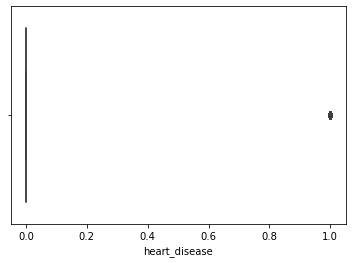

In [46]:
sns.boxplot(df['heart_disease'])

In [47]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


<AxesSubplot:xlabel='gender', ylabel='count'>

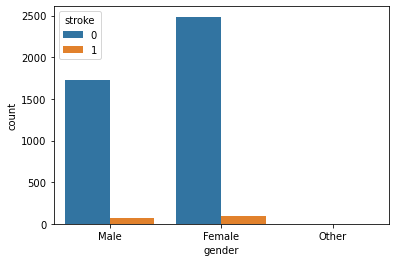

In [48]:
sns.countplot(x=df['gender'],hue=df['stroke'])

<AxesSubplot:xlabel='hypertension', ylabel='count'>

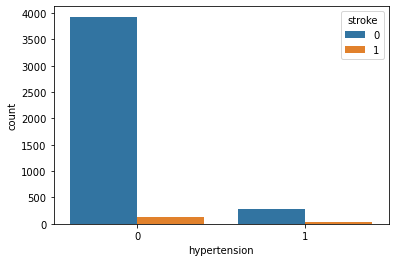

In [49]:
sns.countplot(x=df['hypertension'],hue=df['stroke'])

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

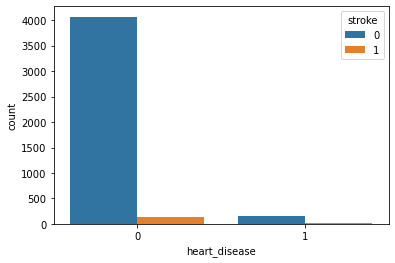

In [50]:
sns.countplot(x=df['heart_disease'],hue=df['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

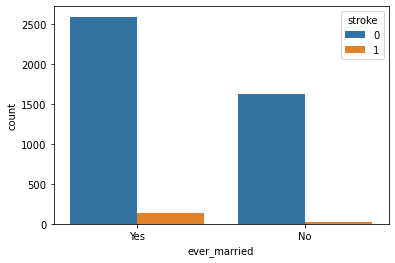

In [51]:
sns.countplot(x=df['ever_married'],hue=df['stroke'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

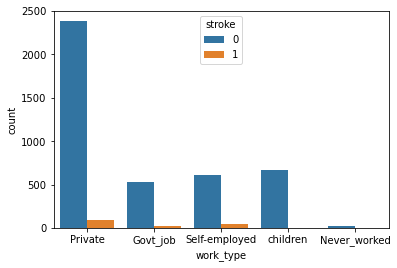

In [52]:
sns.countplot(x=df['work_type'],hue=df['stroke'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

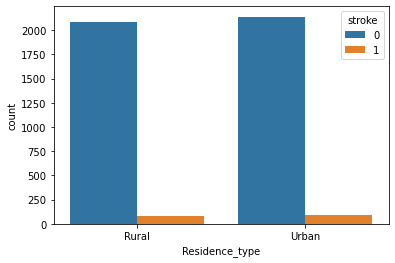

In [53]:
sns.countplot(x=df['Residence_type'],hue=df['stroke'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

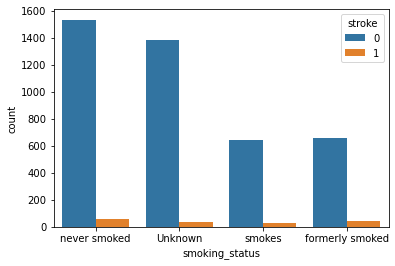

In [54]:
sns.countplot(x=df['smoking_status'],hue=df['stroke'])

In [55]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


<AxesSubplot:xlabel='gender', ylabel='age'>

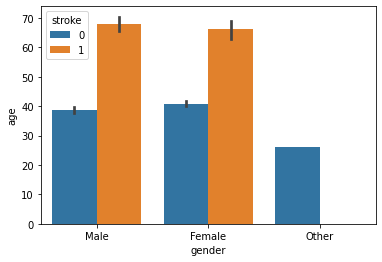

In [56]:
sns.barplot(x=df['gender'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='gender', ylabel='avg_glucose_level'>

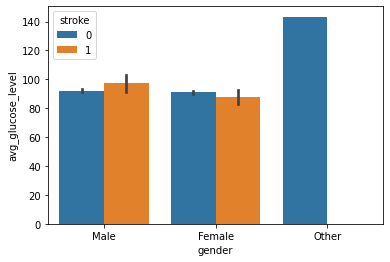

In [57]:
sns.barplot(x=df['gender'],y=df['avg_glucose_level'],hue=df['stroke'])

<AxesSubplot:xlabel='gender', ylabel='bmi'>

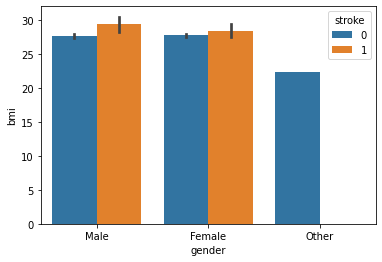

In [58]:
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['stroke'])

<AxesSubplot:xlabel='smoking_status', ylabel='bmi'>

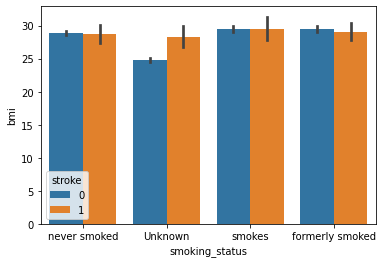

In [59]:
sns.barplot(x=df['smoking_status'],y=df['bmi'],hue=df['stroke'])

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

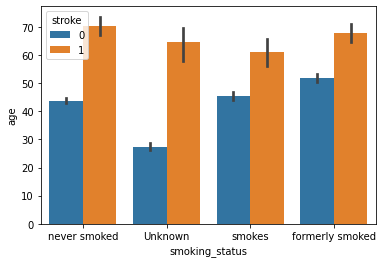

In [60]:
sns.barplot(x=df['smoking_status'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='smoking_status', ylabel='avg_glucose_level'>

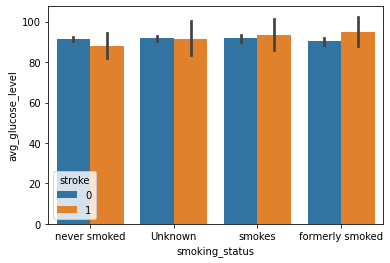

In [61]:
sns.barplot(x=df['smoking_status'],y=df['avg_glucose_level'],hue=df['stroke'])

<AxesSubplot:xlabel='Residence_type', ylabel='age'>

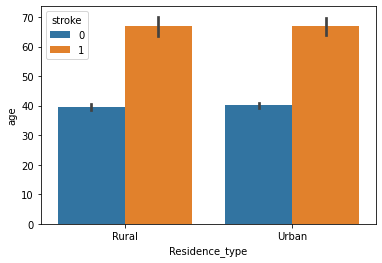

In [62]:
sns.barplot(x=df['Residence_type'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='Residence_type', ylabel='bmi'>

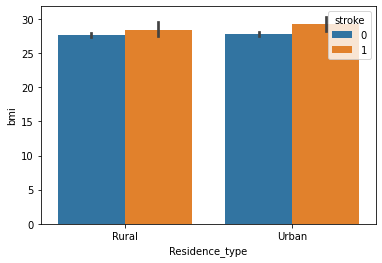

In [63]:
sns.barplot(x=df['Residence_type'],y=df['bmi'],hue=df['stroke'])

<AxesSubplot:xlabel='Residence_type', ylabel='avg_glucose_level'>

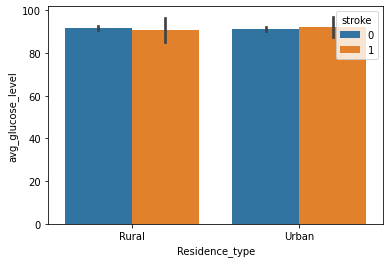

In [64]:
sns.barplot(x=df['Residence_type'],y=df['avg_glucose_level'],hue=df['stroke'])

<AxesSubplot:xlabel='work_type', ylabel='avg_glucose_level'>

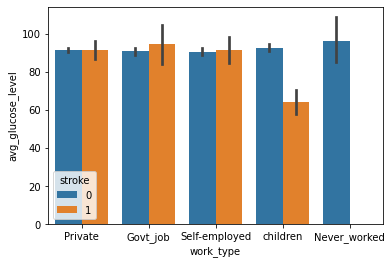

In [65]:
sns.barplot(x=df['work_type'],y=df['avg_glucose_level'],hue=df['stroke'])

<AxesSubplot:xlabel='work_type', ylabel='age'>

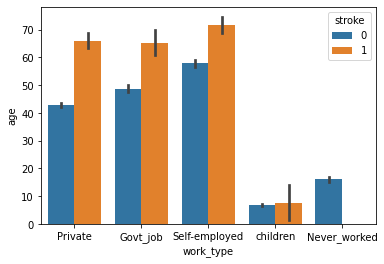

In [66]:
sns.barplot(x=df['work_type'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='work_type', ylabel='bmi'>

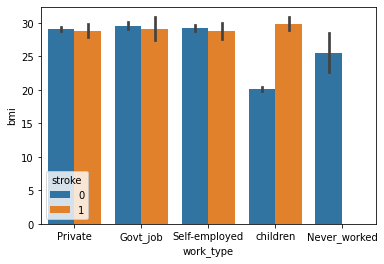

In [67]:
sns.barplot(x=df['work_type'],y=df['bmi'],hue=df['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='bmi'>

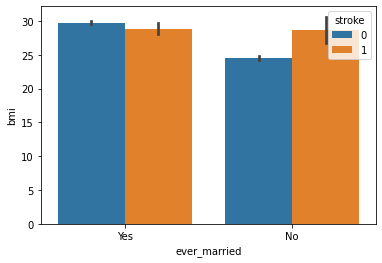

In [68]:
sns.barplot(x=df['ever_married'],y=df['bmi'],hue=df['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='age'>

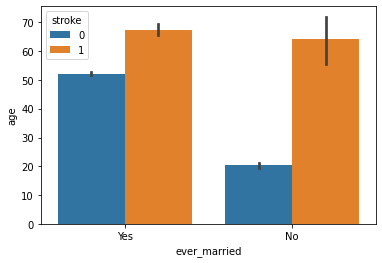

In [69]:
sns.barplot(x=df['ever_married'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='avg_glucose_level'>

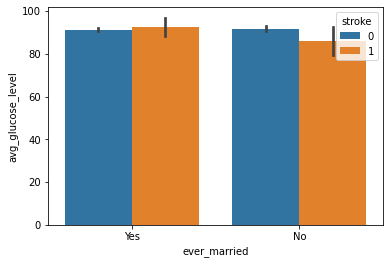

In [70]:
sns.barplot(x=df['ever_married'],y=df['avg_glucose_level'],hue=df['stroke'])

<AxesSubplot:xlabel='hypertension', ylabel='avg_glucose_level'>

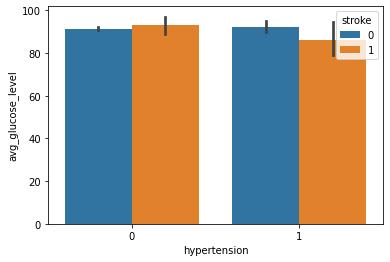

In [71]:
sns.barplot(x=df['hypertension'],y=df['avg_glucose_level'],hue=df['stroke'])

<AxesSubplot:xlabel='hypertension', ylabel='age'>

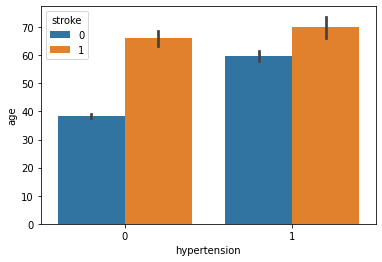

In [72]:
sns.barplot(x=df['hypertension'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='hypertension', ylabel='bmi'>

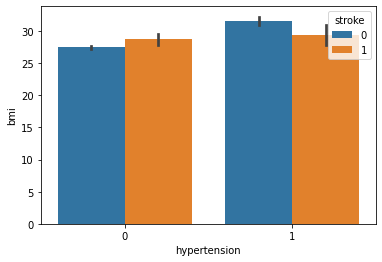

In [73]:
sns.barplot(x=df['hypertension'],y=df['bmi'],hue=df['stroke'])

<AxesSubplot:xlabel='heart_disease', ylabel='bmi'>

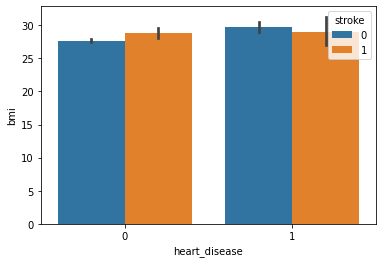

In [74]:
sns.barplot(x=df['heart_disease'],y=df['bmi'],hue=df['stroke'])

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

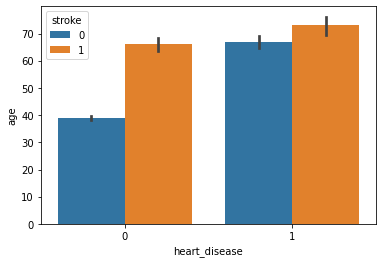

In [75]:
sns.barplot(x=df['heart_disease'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='heart_disease', ylabel='avg_glucose_level'>

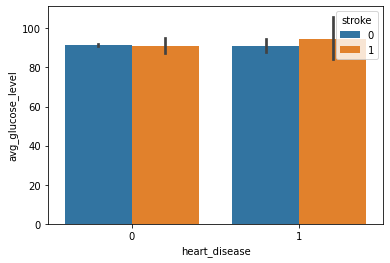

In [76]:
sns.barplot(x=df['heart_disease'],y=df['avg_glucose_level'],hue=df['stroke'])

In [77]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


<AxesSubplot:xlabel='gender', ylabel='age'>

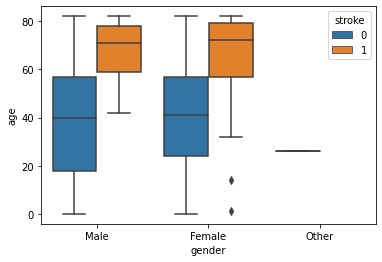

In [78]:
sns.boxplot(x=df['gender'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='gender', ylabel='bmi'>

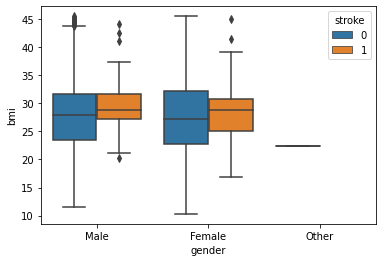

In [79]:
sns.boxplot(x=df['gender'],y=df['bmi'],hue=df['stroke'])

<AxesSubplot:xlabel='gender', ylabel='avg_glucose_level'>

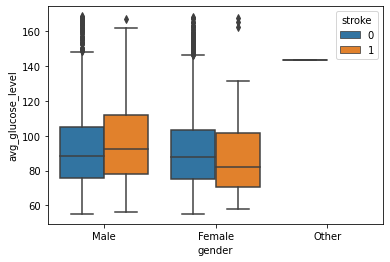

In [80]:
sns.boxplot(x=df['gender'],y=df['avg_glucose_level'],hue=df['stroke'])

<AxesSubplot:xlabel='work_type', ylabel='age'>

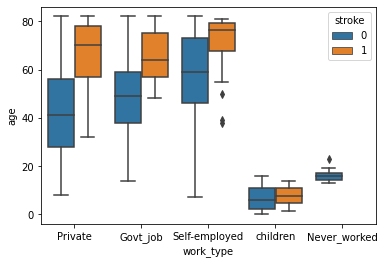

In [81]:
sns.boxplot(x=df['work_type'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='work_type', ylabel='bmi'>

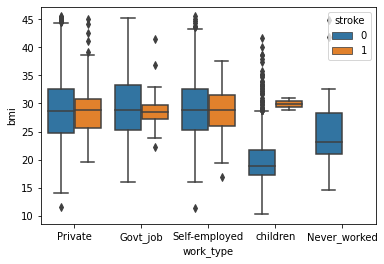

In [82]:
sns.boxplot(x=df['work_type'],y=df['bmi'],hue=df['stroke'])

<AxesSubplot:xlabel='work_type', ylabel='avg_glucose_level'>

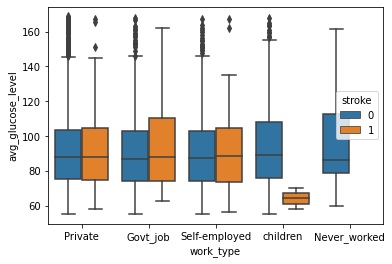

In [83]:
sns.boxplot(x=df['work_type'],y=df['avg_glucose_level'],hue=df['stroke'])

<AxesSubplot:xlabel='Residence_type', ylabel='avg_glucose_level'>

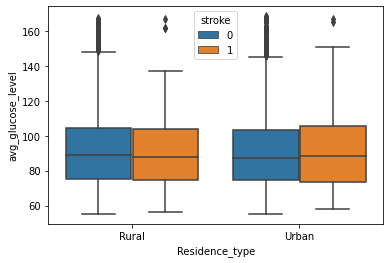

In [84]:
sns.boxplot(x=df['Residence_type'],y=df['avg_glucose_level'],hue=df['stroke'])

<AxesSubplot:xlabel='Residence_type', ylabel='age'>

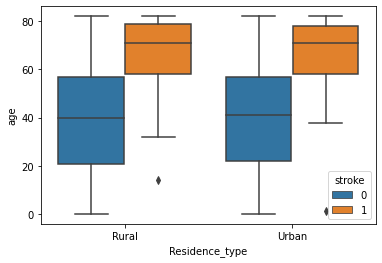

In [85]:
sns.boxplot(x=df['Residence_type'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='Residence_type', ylabel='bmi'>

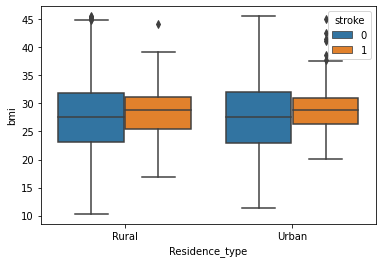

In [86]:
sns.boxplot(x=df['Residence_type'],y=df['bmi'],hue=df['stroke'])

<AxesSubplot:xlabel='smoking_status', ylabel='bmi'>

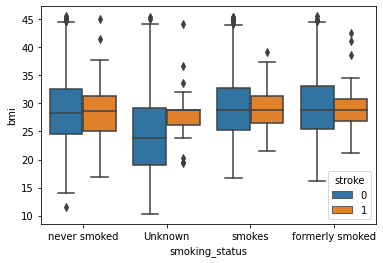

In [87]:
sns.boxplot(x=df['smoking_status'],y=df['bmi'],hue=df['stroke'])

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

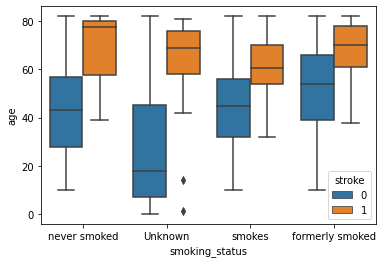

In [88]:
sns.boxplot(x=df['smoking_status'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='smoking_status', ylabel='avg_glucose_level'>

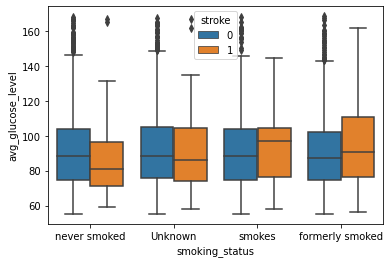

In [89]:
sns.boxplot(x=df['smoking_status'],y=df['avg_glucose_level'],hue=df['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='avg_glucose_level'>

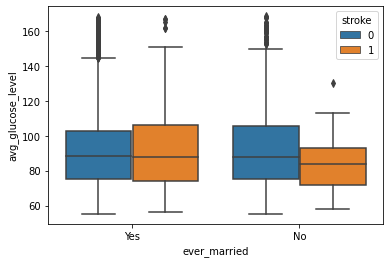

In [90]:
sns.boxplot(x=df['ever_married'],y=df['avg_glucose_level'],hue=df['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='age'>

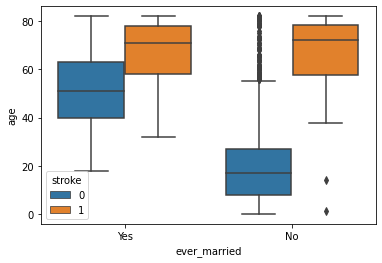

In [91]:
sns.boxplot(x=df['ever_married'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='bmi'>

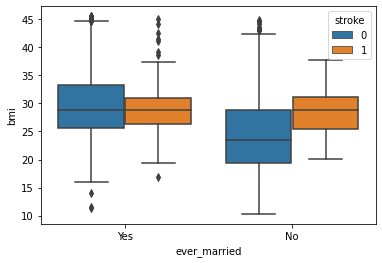

In [92]:
sns.boxplot(x=df['ever_married'],y=df['bmi'],hue=df['stroke'])

<AxesSubplot:xlabel='heart_disease', ylabel='bmi'>

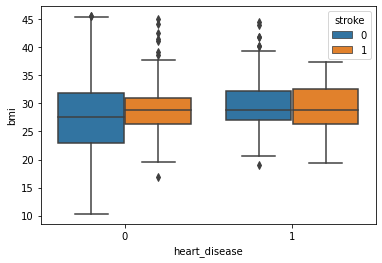

In [93]:
sns.boxplot(x=df['heart_disease'],y=df['bmi'],hue=df['stroke'])

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

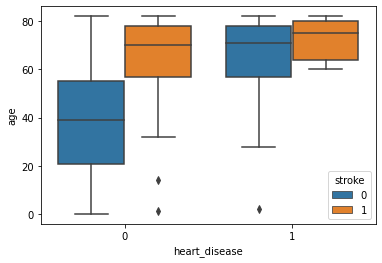

In [94]:
sns.boxplot(x=df['heart_disease'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='heart_disease', ylabel='avg_glucose_level'>

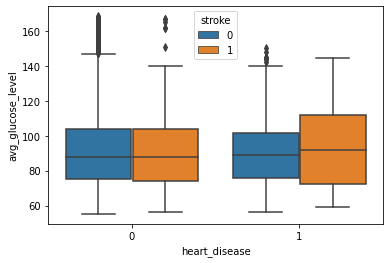

In [95]:
sns.boxplot(x=df['heart_disease'],y=df['avg_glucose_level'],hue=df['stroke'])

<AxesSubplot:xlabel='hypertension', ylabel='avg_glucose_level'>

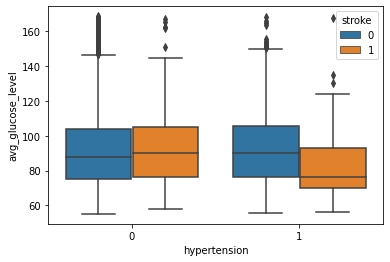

In [96]:
sns.boxplot(x=df['hypertension'],y=df['avg_glucose_level'],hue=df['stroke'])

<AxesSubplot:xlabel='hypertension', ylabel='age'>

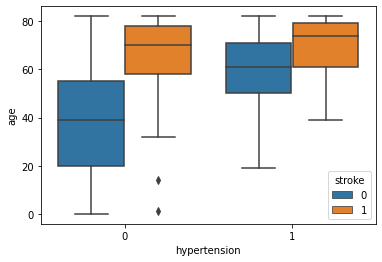

In [97]:
sns.boxplot(x=df['hypertension'],y=df['age'],hue=df['stroke'])

<AxesSubplot:xlabel='hypertension', ylabel='bmi'>

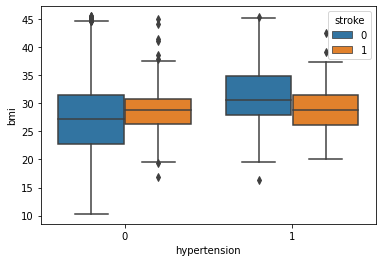

In [98]:
sns.boxplot(x=df['hypertension'],y=df['bmi'],hue=df['stroke'])

In [99]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


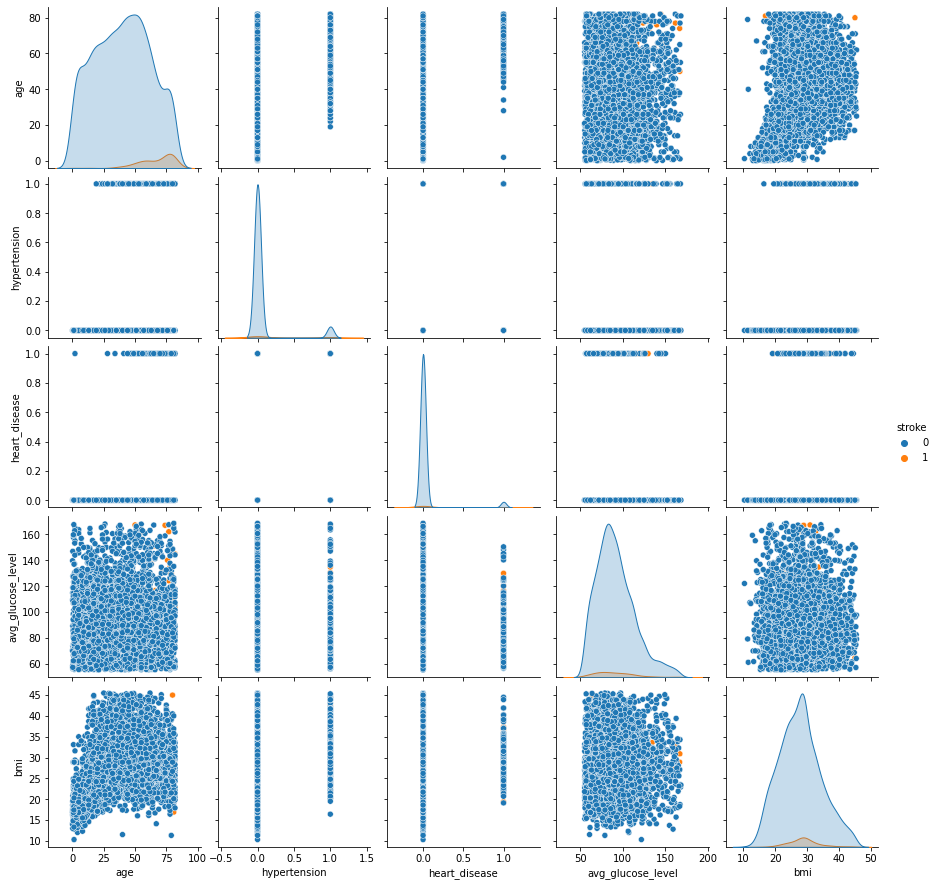

In [100]:
sns.pairplot(data=df,hue='stroke')

<AxesSubplot:>

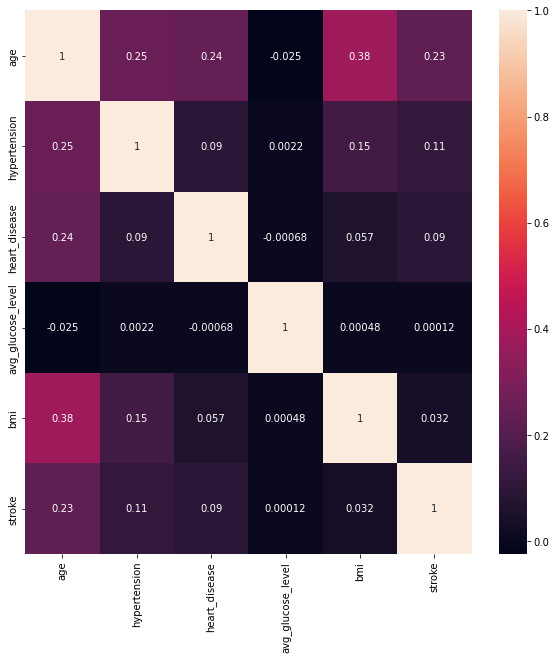

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [102]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


<AxesSubplot:xlabel='age', ylabel='bmi'>

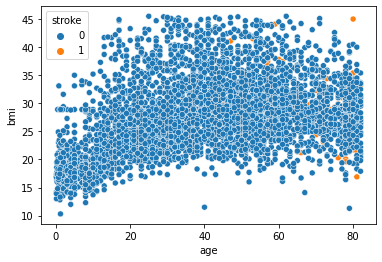

In [103]:
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['stroke'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

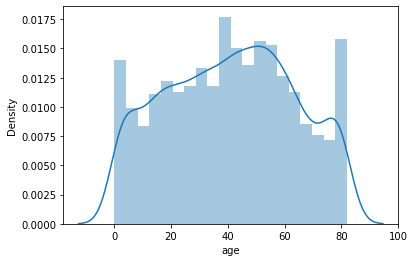

In [104]:
sns.distplot(df['age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hypertension', ylabel='Density'>

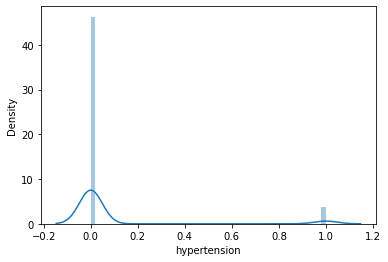

In [105]:
sns.distplot(df['hypertension'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='heart_disease', ylabel='Density'>

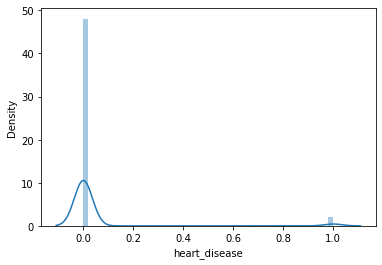

In [106]:
sns.distplot(df['heart_disease'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

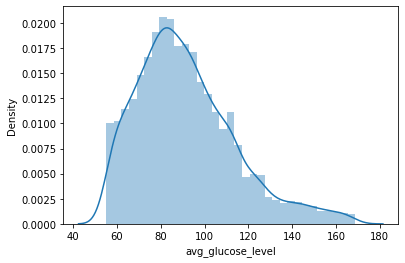

In [107]:
sns.distplot(df['avg_glucose_level'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

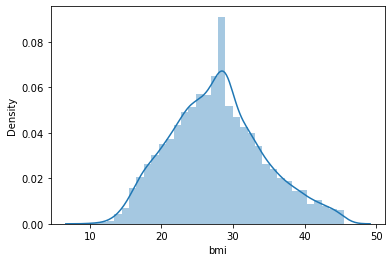

In [108]:
sns.distplot(df['bmi'])

In [109]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [110]:
le=LabelEncoder()


In [111]:
df['gender']=le.fit_transform(df['gender'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_6836\3002396164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']=le.fit_transform(df['gender'])


In [112]:
df['ever_married']=le.fit_transform(df['ever_married'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_6836\1395348626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married']=le.fit_transform(df['ever_married'])


In [113]:
df['work_type']=le.fit_transform(df['work_type'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_6836\2064987372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_type']=le.fit_transform(df['work_type'])


In [114]:
df['Residence_type']=le.fit_transform(df['Residence_type'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_6836\3686535570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residence_type']=le.fit_transform(df['Residence_type'])


In [115]:
df['smoking_status']=le.fit_transform(df['smoking_status'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_6836\3283868053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status']=le.fit_transform(df['smoking_status'])


In [116]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [117]:
df['stroke'].value_counts()

0    4219
1     164
Name: stroke, dtype: int64

In [118]:
X=df.drop('stroke',axis=1)

In [119]:
y=df['stroke']

In [120]:
from imblearn.over_sampling import SMOTE

In [121]:
smote=SMOTE(sampling_strategy='minority')

In [122]:
X_sm,y_sm=smote.fit_resample(X,y)


In [123]:
X_sm.shape

(8438, 10)

In [124]:
y_sm.shape

(8438,)

In [125]:
sc=StandardScaler()


In [126]:
X_sm=sc.fit_transform(X_sm)


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [128]:
X_train.shape

(6750, 10)

In [129]:
X_test.shape

(1688, 10)

In [130]:
y_train.shape

(6750,)

In [131]:
y_test.shape

(1688,)

# RandomForestClassifier

In [132]:
rfc=RandomForestClassifier()


In [133]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [134]:
y_pred=rfc.predict(X_train)

In [135]:
accuracy_score(y_train,y_pred)

1.0

In [136]:
cm=confusion_matrix(y_train,y_pred)

<AxesSubplot:>

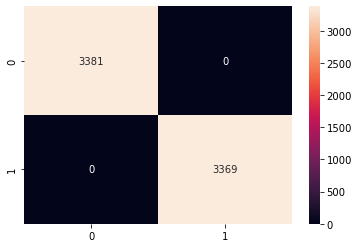

In [137]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [138]:
y_pred=rfc.predict(X_test)

In [139]:
y_pred[:10]

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [140]:
y_test[:10]

4048    0
1535    0
5609    1
1053    0
5761    1
4655    1
5485    1
8216    1
3791    0
4640    1
Name: stroke, dtype: int64

In [141]:
accuracy_score(y_test,y_pred)

0.9472748815165877

In [142]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

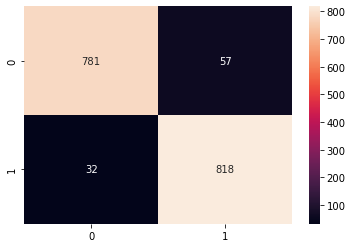

In [143]:
sns.heatmap(data=cm,annot=True,fmt='d')

# Logistic Regression

In [144]:
lr=LogisticRegression()


In [145]:
lr.fit(X_train,y_train)

LogisticRegression()

In [146]:
y_pred=lr.predict(X_train)

In [147]:
accuracy_score(y_train,y_pred)

0.8100740740740741

In [148]:
cm=confusion_matrix(y_train,y_pred)

<AxesSubplot:>

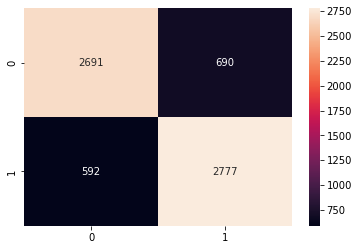

In [149]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [150]:
y_pred=lr.predict(X_test)

In [151]:
y_pred[:10]

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [152]:
y_test[:10]

4048    0
1535    0
5609    1
1053    0
5761    1
4655    1
5485    1
8216    1
3791    0
4640    1
Name: stroke, dtype: int64

In [153]:
accuracy_score(y_test,y_pred)

0.8116113744075829

In [154]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

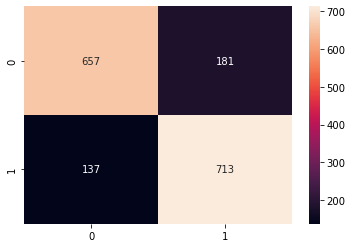

In [155]:
sns.heatmap(data=cm,annot=True,fmt='d')

# KNeighborsClassifier

In [156]:
knc=KNeighborsClassifier()


In [157]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [158]:
y_pred=knc.predict(X_train)

In [159]:
accuracy_score(y_train,y_pred)

0.9265185185185185

In [160]:
cm=confusion_matrix(y_train,y_pred)

<AxesSubplot:>

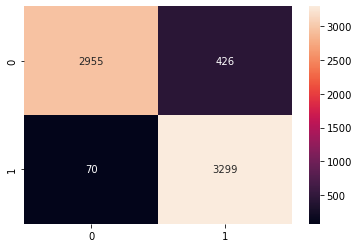

In [161]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [162]:
y_pred=knc.predict(X_test)

In [163]:
y_pred[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [164]:
y_test[:10]

4048    0
1535    0
5609    1
1053    0
5761    1
4655    1
5485    1
8216    1
3791    0
4640    1
Name: stroke, dtype: int64

In [165]:
accuracy_score(y_test,y_pred)

0.893957345971564

In [166]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

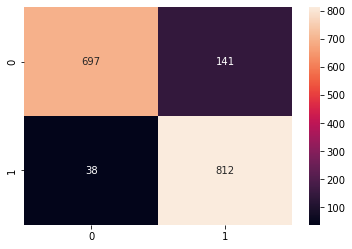

In [167]:
sns.heatmap(data=cm,annot=True,fmt='d')

# XGBClassifier

In [168]:
xgb_i=xgb.XGBClassifier()

In [169]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [170]:
y_pred=xgb_i.predict(X_train)

In [171]:
accuracy_score(y_train,y_pred)

0.997037037037037

In [172]:
cm=confusion_matrix(y_train,y_pred)

<AxesSubplot:>

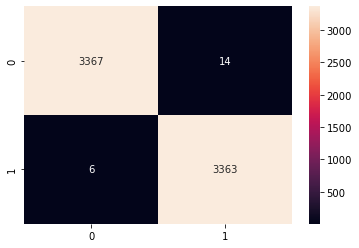

In [173]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [174]:
y_pred=xgb_i.predict(X_test)

In [175]:
y_pred[:10]

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [176]:
y_test[:10]

4048    0
1535    0
5609    1
1053    0
5761    1
4655    1
5485    1
8216    1
3791    0
4640    1
Name: stroke, dtype: int64

In [177]:
accuracy_score(y_test,y_pred)

0.9632701421800948

In [178]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

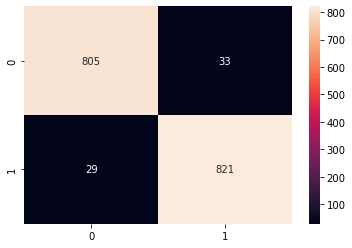

In [179]:
sns.heatmap(data=cm,annot=True,fmt='d')

# Neural Network

In [180]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(10,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')  
])

In [181]:
model.compile(
optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy'])

In [182]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
211/211 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7284
Epoch 2/10
211/211 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8204
Epoch 3/10
211/211 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8317
Epoch 4/10
211/211 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8394
Epoch 5/10
211/211 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8412
Epoch 6/10
211/211 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.8425
Epoch 7/10
211/211 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8465
Epoch 8/10
211/211 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8513
Epoch 9/10
211/211 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8520
Epoch 10/10
211/211 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8551

In [183]:
model.evaluate(X_test,y_test)

53/53 [==============================] - 0s 1ms/step - loss: 0.3383 - accuracy: 0.8460


[0.33825287222862244, 0.8459715843200684]

In [184]:
y_pred=model.predict(X_test)

53/53 [==============================] - 0s 1ms/step


In [185]:
ypred=[]
for i in y_pred:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [186]:
ypred[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [187]:
y_test[:10]

4048    0
1535    0
5609    1
1053    0
5761    1
4655    1
5485    1
8216    1
3791    0
4640    1
Name: stroke, dtype: int64

In [188]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=ypred)


<AxesSubplot:>

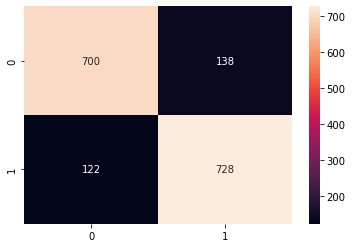

In [189]:
sns.heatmap(data=cm,annot=True,fmt='d')